## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

import warnings 
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.impute import KNNImputer

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datathon-2024/sample_submission.csv
/kaggle/input/datathon-2024/test_x.csv
/kaggle/input/datathon-2024/train.csv


## Load and Read the Dataset

In [2]:
df_train= pd.read_csv('/kaggle/input/datathon-2024/train.csv')
df_test = pd.read_csv('/kaggle/input/datathon-2024/test_x.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# pip install ydata-profiling

In [4]:
'''from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="GİRVAK Report", explorative=True)
profile.to_notebook_iframe()'''

'from ydata_profiling import ProfileReport\nprofile = ProfileReport(df_train, title="GİRVAK Report", explorative=True)\nprofile.to_notebook_iframe()'

In [5]:
df_train.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [6]:
df_train.tail()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
65120,2022,0.0,Erkek,18.06.2003 00:00,İstanbul,İstanbul,İstanbul Aydın Üniversitesi,Özel,NaN,Evet,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65120
65121,2022,0.0,Erkek,18.04.2002 00:00,Hatay,Muğla,Muğla Sıtkı Koçman Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65121
65122,2022,0.0,Erkek,23.10.1999 00:00,Mersin,Mersin,Süleyman Demirel Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65122
65123,2022,0.0,Erkek,17.11.2000 00:00,Samsun,Samsun,Karabük Üniversitesi,Devlet,NaN,Hayır,...,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,NaN,65123
65124,2022,NaN,Kadın,27.04.2000 00:00,Hatay,Hatay,Gaziantep Üniversitesi,Devlet,NaN,Hayır,...,Takım Oyuncusu,Evet,Genç Kızılay Topluluğu'nda 3 yıldır gönüllüyüm...,NaN,Evet,Aile desteğiyle yemek sektöründe küçük bir işl...,Evet,NaN,NaN,65124


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

In [8]:
print(df_train['Ingilizce Biliyor musunuz?'].value_counts())

Ingilizce Biliyor musunuz?
Evet     48872
Hayır     9799
Name: count, dtype: int64


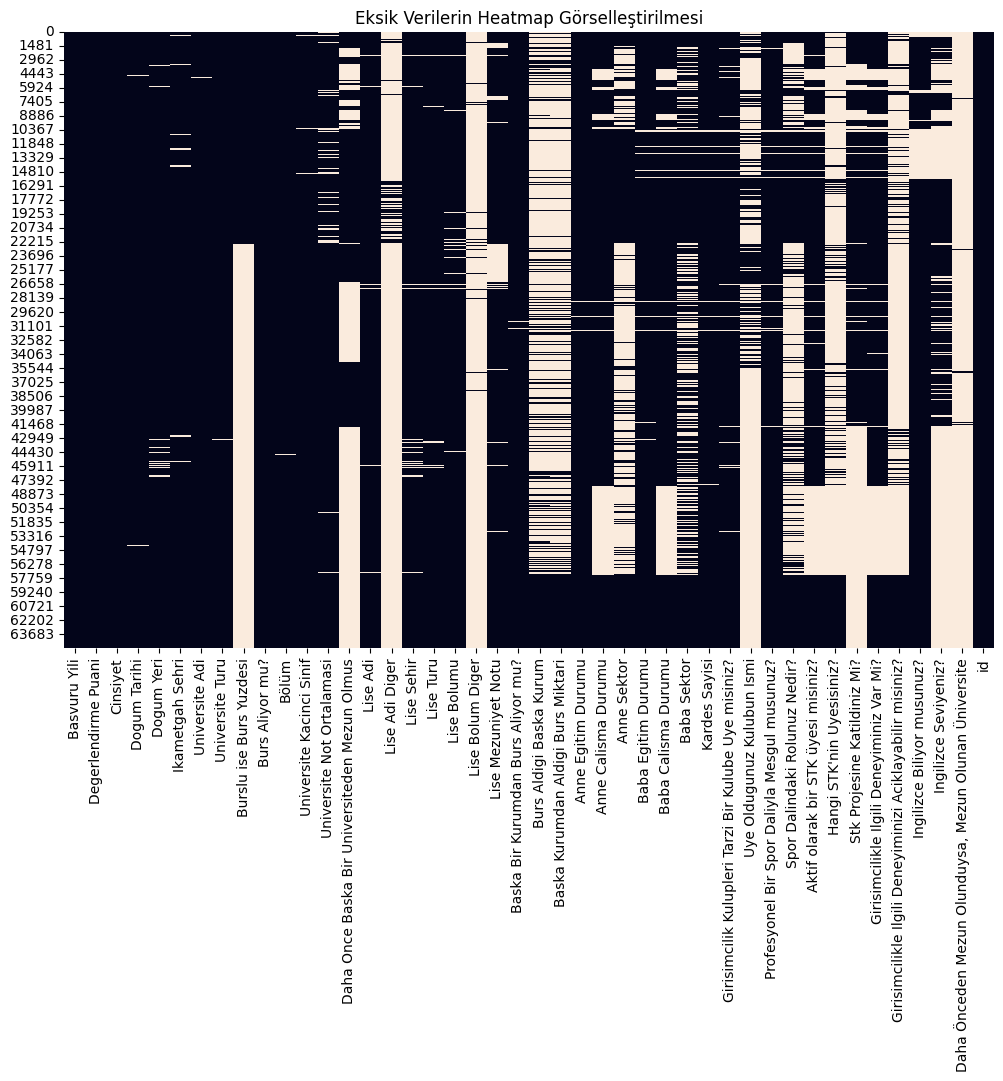

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.isnull(), cbar=False)
plt.title('Eksik Verilerin Heatmap Görselleştirilmesi')
plt.show()

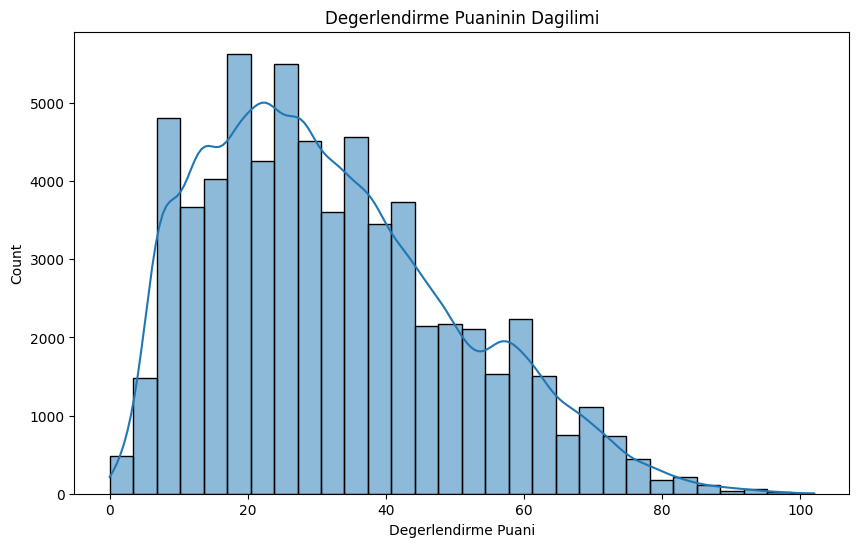

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Degerlendirme Puani'], kde=True, bins=30)
plt.title('Degerlendirme Puaninin Dagilimi')
plt.show()

## Data Cleaning 

In [11]:
df_train['Universite Adi'] = df_train['Universite Adi'].apply(lambda x: x.lower().strip() if isinstance(x, str) else x)

In [12]:
df_train['Universite Adi']

0                  i̇hsan doğramaci bi̇lkent
1                  i̇hsan doğramaci bi̇lkent
2        uluslararasi kibris üni̇versi̇tesi̇
3           i̇stanbul şehi̇r üni̇versi̇tesi̇
4                turgut özal üni̇versi̇tesi̇
                        ...                 
65120           i̇stanbul aydın üniversitesi
65121        muğla sıtkı koçman üniversitesi
65122          süleyman demirel üniversitesi
65123                   karabük üniversitesi
65124                 gaziantep üniversitesi
Name: Universite Adi, Length: 65125, dtype: object

In [13]:
df_train['Universite Adi'].value_counts()

Universite Adi
i̇stanbul üni̇versi̇tesi̇                      2083
marmara üni̇versi̇tesi̇                        1672
i̇stanbul tekni̇k üni̇versi̇tesi̇              1464
yildiz tekni̇k üni̇versi̇tesi̇                 1438
orta doğu tekni̇k üni̇versi̇tesi̇              1258
                                               ... 
i̇stanbul bilim üniversitesi                      1
selahaddin eyyubi üniversitesi                    1
alanya hamdullah emi̇n paşa üni̇versi̇tesi̇       1
harp akademi̇leri̇ (kara, deni̇z,                 1
i̇stanbul atlas üniversitesi                      1
Name: count, Length: 526, dtype: int64

In [14]:
df_train['Anne Calisma Durumu'].value_counts()

Anne Calisma Durumu
Hayır     39371
Evet      10504
Emekli     3354
Name: count, dtype: int64

In [15]:
df_train.groupby("Anne Calisma Durumu")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Anne Calisma Durumu
Emekli    39.504174
Evet      37.513899
Hayır     31.521107
Name: Degerlendirme Puani, dtype: float64

In [16]:
anne_calisma_mapping = {
    'Emekli': 3,
    'Evet': 2,
    'Hayır': 1
}

df_train['Anne Calisma Durumu'] = df_train['Anne Calisma Durumu'].map(anne_calisma_mapping)

print(df_train['Anne Calisma Durumu'].value_counts())

Anne Calisma Durumu
1.0    39371
2.0    10504
3.0     3354
Name: count, dtype: int64


In [17]:
print(df_train['Dogum Yeri'].value_counts())
print(df_train['Ikametgah Sehri'].value_counts())
print(df_train['Lise Sehir'].value_counts())

Dogum Yeri
İstanbul             8682
Ankara               4045
İzmir                2170
Istanbul             1894
Adana                1810
                     ... 
körfez/kocaeli          1
GEDIZ                   1
İstanbul Bakırköy       1
İstanbul-Şişli          1
Ankara keçiören         1
Name: count, Length: 2230, dtype: int64
Ikametgah Sehri
İstanbul               16625
Ankara                  6485
Istanbul                3469
İzmir                   3096
Bursa                   1752
                       ...  
Beylikdüzü/İstanbul        1
ODTÜ/Ankara                1
Dilovası/Kocaeli           1
Çaycuma/Zonguldak          1
Çankaya/Ankara             1
Name: count, Length: 319, dtype: int64
Lise Sehir
İstanbul          8868
Ankara            4940
Istanbul          3933
İzmir             2241
Bursa             2240
                  ... 
BİGA/ÇANAKKALE       1
luleburgaz           1
kirklareli           1
Isranbul             1
Tursunzade           1
Name: count, Length: 888,

In [18]:
sehirler = [
    "Adana", "Adıyaman", "Afyonkarahisar", "Ağrı", "Aksaray", "Amasya", "Ankara", "Antalya",
    "Ardahan", "Artvin", "Aydın", "Balıkesir", "Bartın", "Batman", "Bayburt", "Bilecik", "Bingöl",
    "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır",
    "Düzce", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane",
    "Hakkari", "Hatay", "Iğdır", "Isparta", "İstanbul", "İzmir", "Kahramanmaraş", "Karabük", "Karaman",
    "Kars", "Kastamonu", "Kayseri", "Kilis", "Kırıkkale", "Kırklareli", "Kırşehir", "Kocaeli", "Konya",
    "Kütahya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu",
    "Osmaniye", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Şanlıurfa", "Şırnak", "Tekirdağ",
    "Tokat", "Trabzon", "Tunceli", "Uşak", "Van", "Yalova", "Yozgat", "Zonguldak"
]


def temizle_sehir(sehir):
    if pd.isna(sehir):
        return None
    if isinstance(sehir, str):
        sehir = sehir.lower()
        sehir = sehir.strip()

        for il in sehirler:
            if il.lower() in sehir:
                return il
    return None

df_train["Dogum Yeri"] = df_train["Dogum Yeri"].apply(temizle_sehir)
df_train["Ikametgah Sehri"] = df_train["Ikametgah Sehri"].apply(temizle_sehir)
df_train["Lise Sehir"]= df_train["Lise Sehir"].apply(temizle_sehir)

In [19]:
def extract_numbers(text):
    if isinstance(text, str):
        numbers = re.findall(r'\d+', text)
        return int(max(numbers, key=int)) if numbers else 0
    return 0

df_train['Baska Kurumdan Aldigi Burs Miktari'] = df_train['Baska Kurumdan Aldigi Burs Miktari'].apply(extract_numbers)

In [20]:
def extract_year(date_str):

    match = re.search(r'(\d{4})', str(date_str))
    if match:
        return int(match.group(1))
    return None

df_train['Dogum Yili'] = df_train['Dogum Tarihi'].apply(extract_year)
df_train['Basvuru Yasi'] = df_train['Basvuru Yili'] - df_train['Dogum Yili']

In [21]:
print(df_train['Ikametgah Sehri'].value_counts())

Ikametgah Sehri
İstanbul    16739
Ankara       6602
İzmir        3104
Bursa        1794
Kocaeli      1472
            ...  
Tunceli        65
Kilis          59
Artvin         55
Çankırı        49
Ardahan        33
Name: count, Length: 81, dtype: int64


In [22]:
df_train.groupby("Ikametgah Sehri")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Ikametgah Sehri
İstanbul    36.804349
İzmir       35.448131
Yalova      35.444444
Ankara      35.322478
Isparta     35.160569
              ...    
Şırnak      23.354260
Iğdır       23.300000
Muş         23.296296
Bayburt     21.735294
Hakkari     20.843750
Name: Degerlendirme Puani, Length: 81, dtype: float64

In [23]:
ikamet_sehri_onem_mapping = {
    'İstanbul': 10,
    'İzmir': 9,
    'Yalova': 8,
    'Ankara': 7,
    'Isparta': 6,

}

df_train['Ikametgah Sehri'] = df_train['Ikametgah Sehri'].map(ikamet_sehri_onem_mapping)

print(df_train['Ikametgah Sehri'].value_counts()) 

Ikametgah Sehri
10.0    16739
7.0      6602
9.0      3104
6.0       492
8.0       207
Name: count, dtype: int64


In [24]:
df_train['Universite Turu'] = df_train['Universite Turu'].replace({
    'DEVLET': 'Devlet',
    'ÖZEL': 'Özel'
})

print(df_train['Universite Turu'].value_counts())

Universite Turu
Devlet    53262
Özel      11608
Name: count, dtype: int64


In [25]:
df_grouped = df_train.groupby("Universite Turu")["Degerlendirme Puani"].mean().sort_values(ascending=False)
df_grouped

Universite Turu
Özel      37.092436
Devlet    31.024164
Name: Degerlendirme Puani, dtype: float64

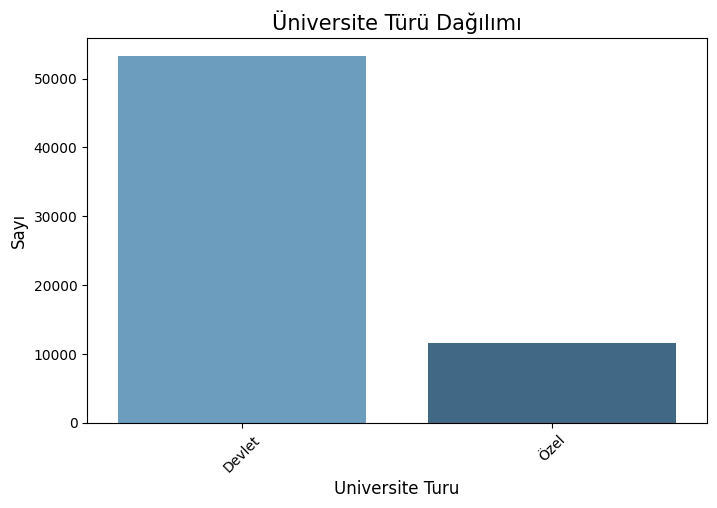

In [26]:
lise_turu_sayisi = df_train['Universite Turu'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=lise_turu_sayisi.index, y=lise_turu_sayisi.values, palette="Blues_d")

plt.title('Üniversite Türü Dağılımı', fontsize=15)
plt.xlabel('Universite Turu', fontsize=12)
plt.ylabel('Sayı', fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [27]:
uni_turu_onem_mapping = {
    'Devlet': 2,
    'Özel': 1
}

df_train['Universite Turu'] = df_train['Universite Turu'].map(uni_turu_onem_mapping)

print(df_train['Universite Turu'].value_counts())

Universite Turu
2.0    53262
1.0    11608
Name: count, dtype: int64


In [28]:
print(df_train['Lise Turu'].value_counts())

Lise Turu
Anadolu Lisesi       13367
Diğer                13184
Anadolu lisesi        7002
Devlet                6204
Özel                  4746
Düz lise              4179
Meslek lisesi         3666
Düz Lise              2789
Meslek                2454
Fen Lisesi            2159
Özel Lisesi           1474
İmam Hatip Lisesi     1158
Fen lisesi             660
Özel lisesi            489
Meslek Lisesi          415
Özel Lise              332
Name: count, dtype: int64


In [29]:
df_train['Lise Turu'] = df_train['Lise Turu'].replace({
    'Anadolu lisesi': 'Anadolu Lisesi',
    'Düz Lise': 'Düz lise',
    'Meslek lisesi': 'Meslek Lisesi',
    'Fen lisesi': 'Fen Lisesi',
    'Özel lisesi': 'Özel Lise',
    'Özel': 'Özel Lise',
    'Özel Lisesi': 'Özel Lise',
    'Meslek': 'Meslek Lisesi',


})

lise_turu_sayisi = df_train['Lise Turu'].value_counts()

print(lise_turu_sayisi)

Lise Turu
Anadolu Lisesi       20369
Diğer                13184
Özel Lise             7041
Düz lise              6968
Meslek Lisesi         6535
Devlet                6204
Fen Lisesi            2819
İmam Hatip Lisesi     1158
Name: count, dtype: int64


In [30]:
df_grouped = df_train.groupby("Lise Turu")["Degerlendirme Puani"].mean().sort_values(ascending=False)
df_grouped

Lise Turu
Fen Lisesi           39.023058
Anadolu Lisesi       35.162993
Özel Lise            35.073285
Devlet               30.817346
Diğer                30.683783
Düz lise             29.842566
Meslek Lisesi        26.336190
İmam Hatip Lisesi    22.531088
Name: Degerlendirme Puani, dtype: float64

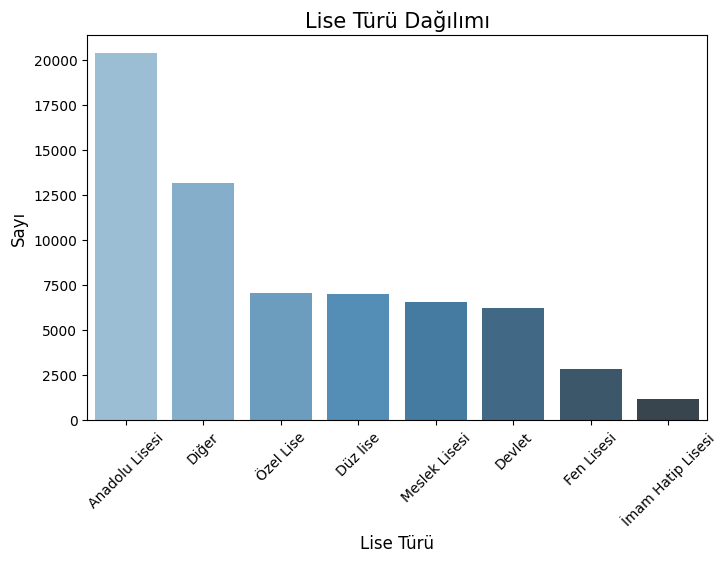

In [31]:
lise_turu_sayisi = df_train['Lise Turu'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=lise_turu_sayisi.index, y=lise_turu_sayisi.values, palette="Blues_d")

plt.title('Lise Türü Dağılımı', fontsize=15)
plt.xlabel('Lise Türü', fontsize=12)
plt.ylabel('Sayı', fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [32]:
lise_turu_onem_mapping = {
    'Fen Lisesi': 4,
    'Anadolu Lisesi': 3,
    'Özel Lise': 2,
    'Düz lise': 0,
    'Meslek Lisesi': 1,
    'Devlet': 2,
    'İmam Hatip Lisesi': 2,
    'Diğer': 0
}

df_train['Lise Turu'] = df_train['Lise Turu'].map(lise_turu_onem_mapping)

print(df_train['Lise Turu'].value_counts())

Lise Turu
3.0    20369
0.0    20152
2.0    14403
1.0     6535
4.0     2819
Name: count, dtype: int64


In [33]:
df_train.sample(5)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id,Dogum Yili,Basvuru Yasi
33592,2017,32.0,Kadın,8/5/1997,None,NaN,anadolu üni̇versi̇tesi̇,2.0,NaN,Hayır,...,NaN,Evet,Evet,NaN,Evet,Orta,NaN,33592,1997.0,20.0
12839,2014,14.0,Erkek,7/13/1989,None,7.0,artvi̇n çoruh üni̇versi̇tesi̇,2.0,0.0,Hayır,...,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,12839,1989.0,25.0
22593,2016,72.0,Erkek,1994-04-03,İstanbul,7.0,hacettepe üniversitesi,2.0,NaN,Hayır,...,KaosGL,Evet,Evet,NaN,Hayır,NaN,NaN,22593,1994.0,22.0
11921,2014,28.0,Erkek,10/1/1992,Van,10.0,yüzüncü yil üni̇versi̇tesi̇,2.0,0.0,Evet,...,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,11921,1992.0,22.0
41477,2019,28.0,ERKEK,29/05/1998,Şanlıurfa,7.0,ankara üni̇versi̇tesi̇,2.0,NaN,Hayır,...,NaN,Evet,Hayır,NaN,Evet,Başlangıç,NaN,41477,1998.0,21.0


In [34]:
df_train.describe()

,Basvuru Yili,Degerlendirme Puani,Ikametgah Sehri,Universite Turu,Burslu ise Burs Yuzdesi,Lise Turu,Baska Kurumdan Aldigi Burs Miktari,Anne Calisma Durumu,id,Dogum Yili,Basvuru Yasi
count,65125.000000,65124.000000,27144.000000,64870.000000,22440.000000,64278.000000,65125.000000,53229.000000,65125.000000,39416.000000,39416.000000
mean,2018.277298,32.086466,9.068229,1.821057,34.226181,1.675908,134.751063,1.323358,32562.000000,1997.709458,19.950147
std,2.669979,18.139239,1.325038,0.383307,41.632412,1.320237,285.852389,0.587218,18800.112478,113.618476,113.594651
min,2014.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,194.000000,-7934.000000
25%,2016.000000,18.000000,7.000000,2.000000,0.000000,0.000000,0.000000,1.000000,16281.000000,1994.000000,20.000000
50%,2019.000000,29.000000,10.000000,2.000000,0.000000,2.000000,0.000000,1.000000,32562.000000,1996.000000,21.000000
75%,2021.000000,44.000000,10.000000,2.000000,75.000000,3.000000,0.000000,2.000000,48843.000000,1999.000000,22.000000
max,2022.000000,102.000000,10.000000,2.000000,100.000000,4.000000,20010.000000,3.000000,65124.000000,9951.000000,1822.000000


<Axes: xlabel='Degerlendirme Puani', ylabel='Density'>

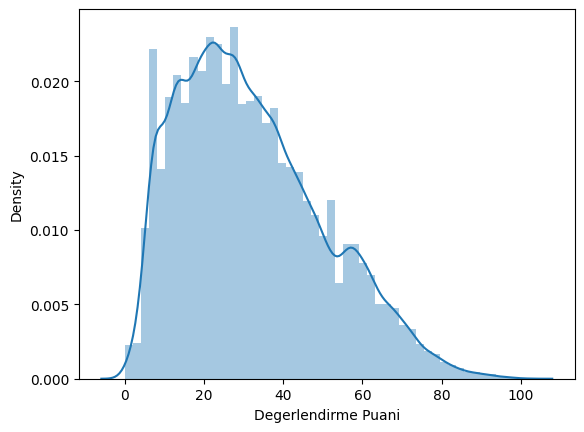

In [35]:
sns.distplot(df_train["Degerlendirme Puani"])

In [36]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Degerlendirme Puani                                              1
Cinsiyet                                                       169
Dogum Tarihi                                                   177
Dogum Yeri                                                    8227
Ikametgah Sehri                                              37981
Universite Adi                                                 132
Universite Turu                                                255
Burslu ise Burs Yuzdesi                                      42685
Bölüm                                                          231
Universite Kacinci Sinif                                       374
Universite Not Ortalamasi                                     2753
Daha Once Baska Bir Universiteden Mezun Olmus                37345
Lise Adi                                                       384
Lise Adi Diger                                               60392
Lise Sehir                                                   1

In [37]:
df_train["Burs Aldigi Baska Kurum"].fillna("-", inplace=True)
df_train["Burs Aldigi Baska Kurum"] = df_train["Burs Aldigi Baska Kurum"].str.lower()
df_train["Burs Aldigi Baska Kurum"] = df_train["Burs Aldigi Baska Kurum"].apply(lambda x: 0 if x == "-" else (1 if "kyk" in x else 2))
df_train.drop(columns=['Burs Aldigi Baska Kurum'], inplace=True)

In [38]:
df_train['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = df_train['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].fillna('-')
df_train['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = df_train['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].apply(lambda x: 0 if x == '-' else 1)

In [39]:
print(df_train['Ingilizce Biliyor musunuz?'].value_counts())

Ingilizce Biliyor musunuz?
Evet     48872
Hayır     9799
Name: count, dtype: int64


In [40]:
df_train['Ingilizce Biliyor musunuz?'] = df_train['Ingilizce Biliyor musunuz?'].map({'Evet': 1, 'Hayır': 0})

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 56898 non-null  object 
 5   Ikametgah Sehri                                            27144 non-null  float64
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  float64
 8   Burslu

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11049 entries, 0 to 11048
Data columns (total 43 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               11049 non-null  int64  
 1   Cinsiyet                                                   11049 non-null  object 
 2   Dogum Tarihi                                               11049 non-null  object 
 3   Dogum Yeri                                                 11049 non-null  object 
 4   Ikametgah Sehri                                            11049 non-null  object 
 5   Universite Adi                                             11049 non-null  object 
 6   Universite Turu                                            11049 non-null  object 
 7   Burslu ise Burs Yuzdesi                                    0 non-null      float64
 8   Burs A

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 56898 non-null  object 
 5   Ikametgah Sehri                                            27144 non-null  float64
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  float64
 8   Burslu

<Axes: >

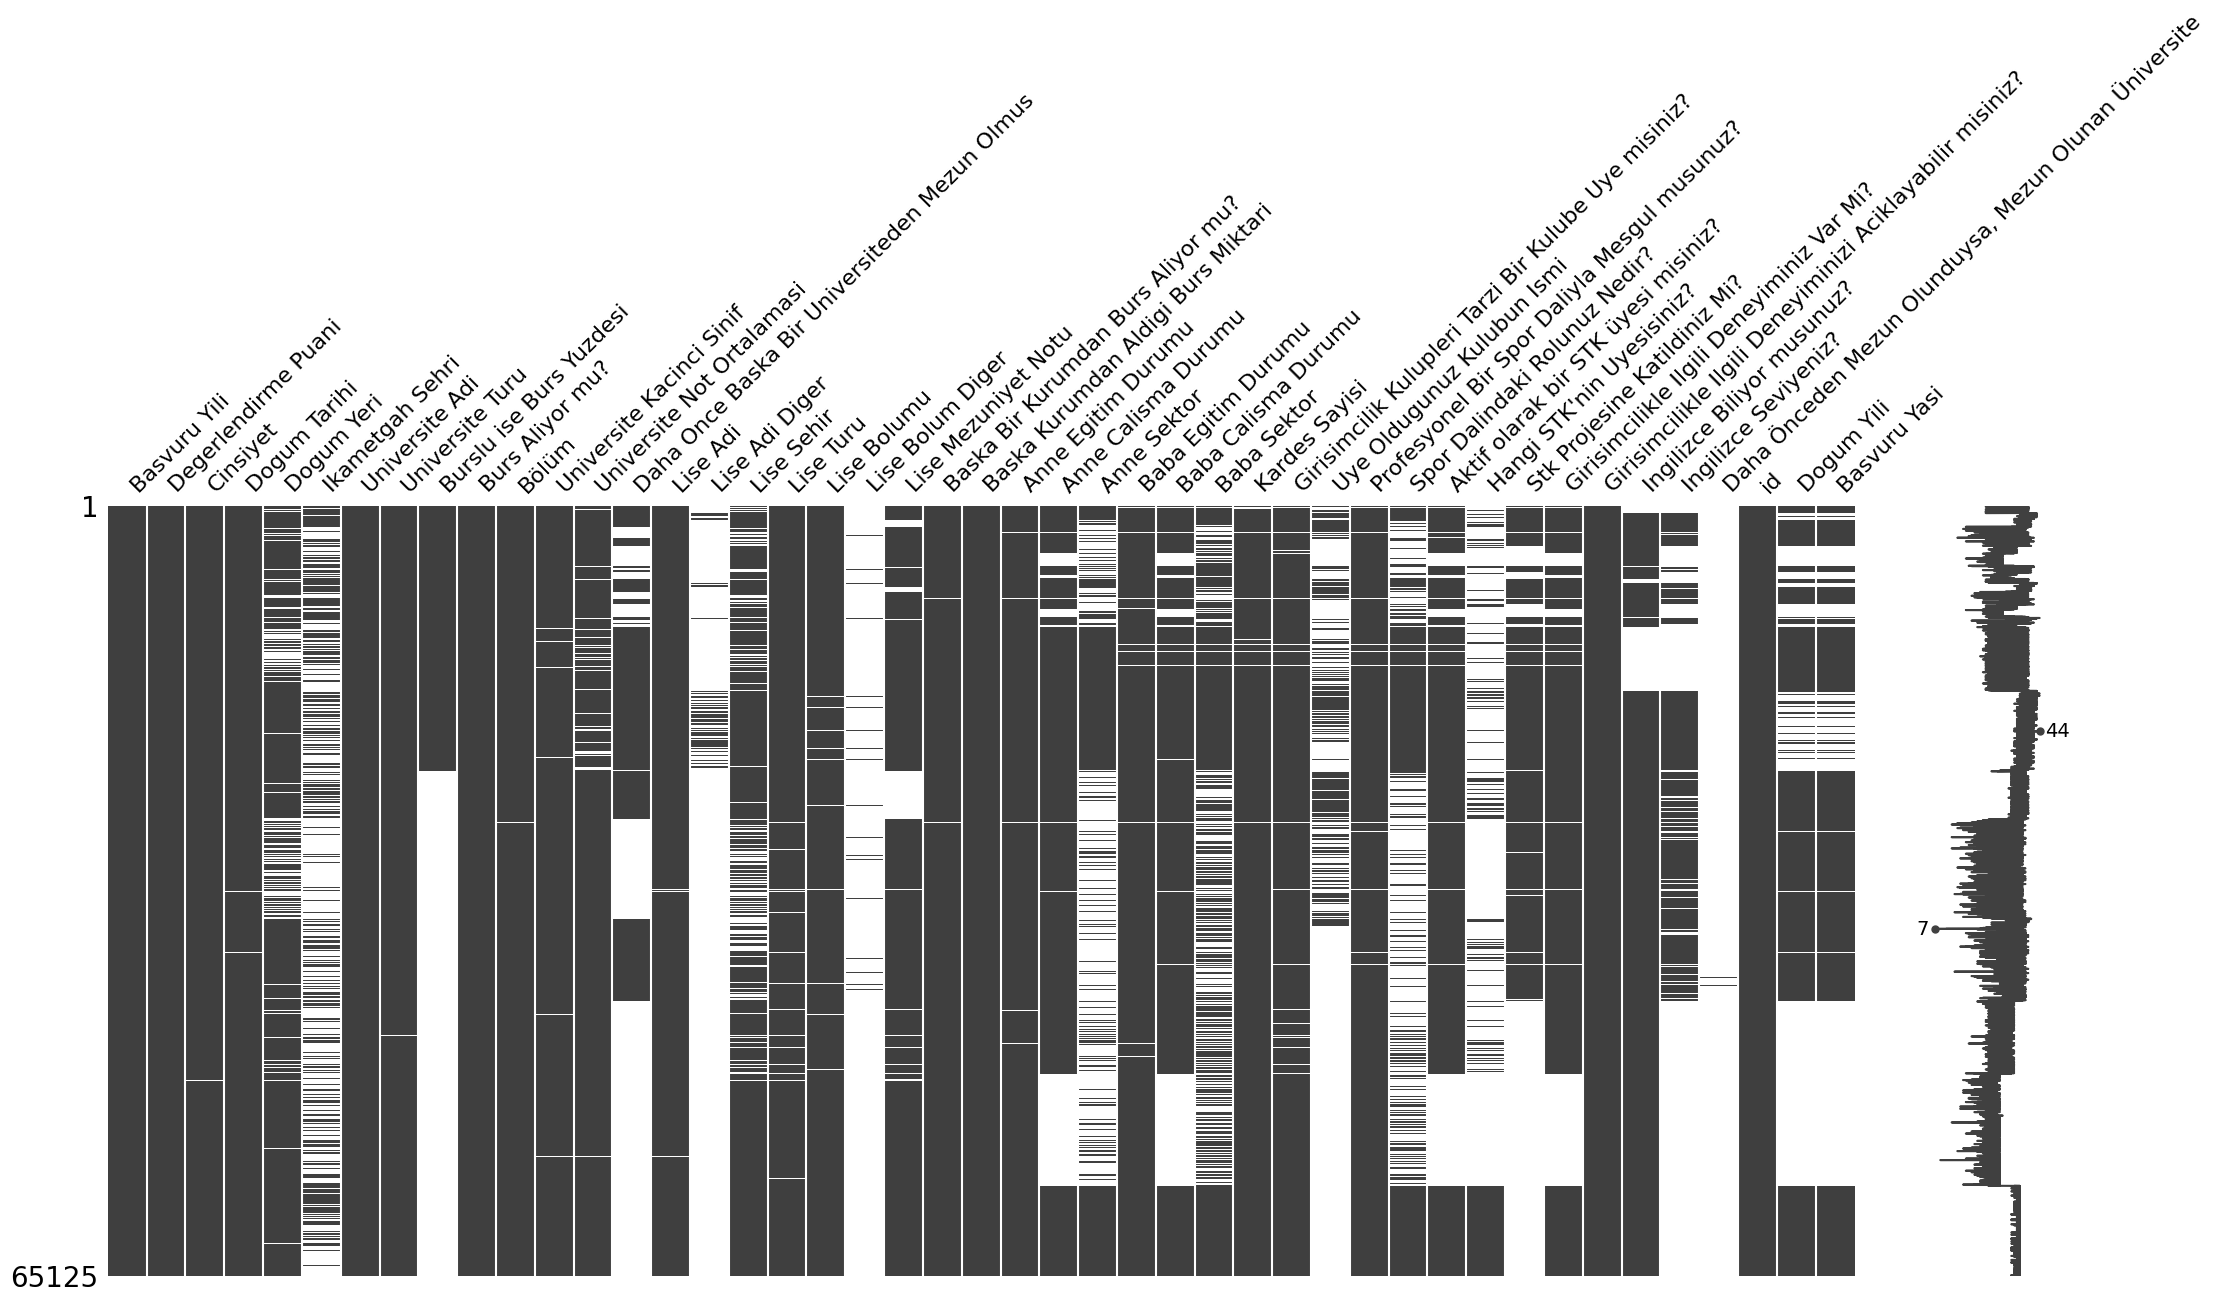

In [44]:
import missingno as msno
msno.matrix(df_train)

In [45]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Degerlendirme Puani                                          1
Cinsiyet                                                   169
Dogum Tarihi                                               177
Dogum Yeri                                                8227
Ikametgah Sehri                                          37981
Universite Adi                                             132
Universite Turu                                            255
Burslu ise Burs Yuzdesi                                  42685
Bölüm                                                      231
Universite Kacinci Sinif                                   374
Universite Not Ortalamasi                                 2753
Daha Once Baska Bir Universiteden Mezun Olmus            37345
Lise Adi                                                   384
Lise Adi Diger                                           60392
Lise Sehir                                               10739
Lise Turu                                              

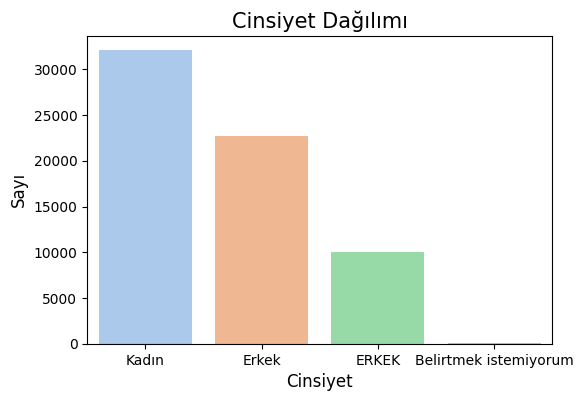

In [46]:
cinsiyet_sayisi = df_train['Cinsiyet'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=cinsiyet_sayisi.index, y=cinsiyet_sayisi.values, palette="pastel")

plt.title('Cinsiyet Dağılımı', fontsize=15)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Sayı', fontsize=12)

plt.show()

In [47]:
df_train['Cinsiyet'] = df_train['Cinsiyet'].replace('ERKEK', 'Erkek')

print(df_train['Cinsiyet'].value_counts())

Cinsiyet
Erkek                    32764
Kadın                    32077
Belirtmek istemiyorum      115
Name: count, dtype: int64


In [48]:
df_train.groupby("Cinsiyet")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Cinsiyet
Kadın                    32.436900
Erkek                    31.801825
Belirtmek istemiyorum    30.165217
Name: Degerlendirme Puani, dtype: float64

In [49]:
df_train.groupby("Burs Aliyor mu?")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Burs Aliyor mu?
Evet     38.482183
evet     33.126126
hayır    32.702206
Hayır    31.214326
EVET     27.953669
Name: Degerlendirme Puani, dtype: float64

In [50]:
df_train['Burs Aliyor mu?'] = df_train['Burs Aliyor mu?'].replace({
    'EVET': 'Evet',
    'evet': 'Evet',
    'hayır': 'Hayır',
    'HAYIR': 'Hayır'
})

print(df_train['Burs Aliyor mu?'].value_counts())

Burs Aliyor mu?
Hayır    52250
Evet     12875
Name: count, dtype: int64


In [51]:
df_train['Burs Aliyor mu?'] = df_train['Burs Aliyor mu?'].map({'Evet':0 , 'Hayır':1})

In [52]:
df_train.describe(include='object').T

,count,unique,top,freq
Cinsiyet,64956,3,Erkek,32764
Dogum Tarihi,64948,13498,1/1/70 2:00,1655
Dogum Yeri,56898,81,İstanbul,8999
Universite Adi,64993,526,i̇stanbul üni̇versi̇tesi̇,2083
Bölüm,64894,7748,Endüstri Mühendisliği,2434
Universite Kacinci Sinif,64751,12,2,21773
Universite Not Ortalamasi,62372,20,3.00-2.50,10758
Daha Once Baska Bir Universiteden Mezun Olmus,27780,2,Hayır,26624
Lise Adi,64741,31950,------,4251
Lise Adi Diger,4733,4010,Atatürk Anadolu Lisesi,8


In [53]:
df_train['Ingilizce Seviyeniz?'].value_counts()

Ingilizce Seviyeniz?
Orta         13057
İleri         8318
Başlangıç     5180
0             2037
Name: count, dtype: int64

In [54]:
ing_seviye_mapping = {'0': 0, 'Başlangıç': 1,'Orta':2,'İleri':3}
df_train['Ingilizce Seviyeniz?'] = df_train['Ingilizce Seviyeniz?'].map(ing_seviye_mapping)

In [55]:
df_train['Universite Not Ortalamasi'] = df_train['Universite Not Ortalamasi'].replace({
    'ORTALAMA BULUNMUYOR': 'Ortalama bulunmuyor',
    'Not ortalaması yok': 'Ortalama bulunmuyor',
    'Hazırlığım': 'Ortalama bulunmuyor',
    '4-3.5': '3.50 - 4.00',
    '4.0-3.5': '3.50 - 4.00',
    '2.50 - 3.00': '2.50 - 3.00',
    '2.50 ve altı': '2.50 ve altı',
    '3.00 - 3.50': '3.00 - 3.50',
    '3.50-3': '3.00 - 3.50',
    '3.50 - 3': '3.00 - 3.50',
    '3.50 - 3.00': '3.00 - 3.50',
    '3.50 - 4.00': '3.50 - 4.00',
    '2.00 - 2.50': '2.00 - 2.50',
    '2.50 - 2.99': '2.50 - 2.99',
    '3.00 - 3.49': '3.00 - 3.50',
    '2.50 -3.00': '2.50 - 3.00',
    '3.00-2.50': '2.50 - 3.00',
    '3.00 - 4.00': '3.00 - 4.00',
    '1.80 - 2.49': '1.80 - 2.49',
    '1.00 - 2.50': '1.00 - 2.50',
    '0 - 1.79': '0 - 1.79'
})

uni = df_train['Universite Not Ortalamasi'].value_counts()

print(uni)

Universite Not Ortalamasi
2.50 - 3.00            18274
3.00 - 3.50            16474
2.50 ve altı           10554
3.50 - 4.00             4944
Ortalama bulunmuyor     4066
2.00 - 2.50             2519
2.50 - 2.99             2452
3.00 - 4.00             1411
1.80 - 2.49             1166
1.00 - 2.50              327
0 - 1.79                 185
Name: count, dtype: int64


In [56]:
df_train.groupby("Universite Not Ortalamasi")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Universite Not Ortalamasi
3.00 - 4.00            37.617293
3.50 - 4.00            37.197613
3.00 - 3.50            33.667658
2.50 - 3.00            32.615465
2.50 ve altı           31.679458
2.50 - 2.99            31.181559
2.00 - 2.50            30.464867
1.00 - 2.50            27.828746
1.80 - 2.49            26.886792
Ortalama bulunmuyor    26.140433
0 - 1.79               23.000000
Name: Degerlendirme Puani, dtype: float64

In [57]:
def not_kategoriye_gore_grupla(not_ortalama):
    if not_ortalama in ['3.50 - 4.00', '3.00 - 3.50']:
        return 'yuksek'
    elif not_ortalama in ['2.50 - 3.00', '3.00 - 4.00']:
        return 'orta_yuksek'
    elif not_ortalama in ['2.00 - 2.50', '2.50 ve altı', '2.50 - 2.99']:
        return 'orta'
    elif not_ortalama in ['1.80 - 2.49', '1.00 - 2.50', '0 - 1.79']:
        return 'dusuk'
    else:
        return 'ortalama_bulunmuyor'

df_train['Universite Not Ortalamasi'] = df_train['Universite Not Ortalamasi'].apply(not_kategoriye_gore_grupla)
df_test['Universite Not Ortalamasi'] = df_test['Universite Not Ortalamasi'].apply(not_kategoriye_gore_grupla)

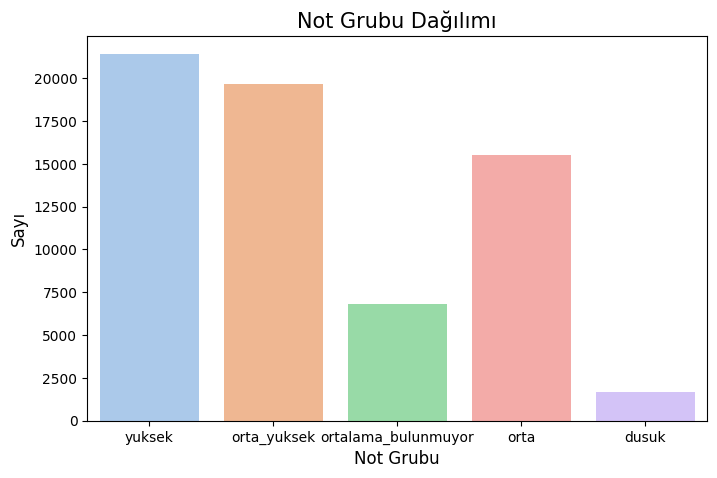

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='Universite Not Ortalamasi', data=df_train, palette="pastel")
plt.title('Not Grubu Dağılımı', fontsize=15)
plt.xlabel('Not Grubu', fontsize=12)
plt.ylabel('Sayı', fontsize=12)
plt.show()

In [59]:
not_grubu_mapping = {
    'yuksek': 4,       
    'orta_yuksek': 3,
    'orta': 2,       
    'dusuk': 0,       
    'ortalama_bulunmuyor': 1  
}

df_train['Universite Not Ortalamasi'] = df_train['Universite Not Ortalamasi'].map(not_grubu_mapping)
df_test['Universite Not Ortalamasi'] = df_test['Universite Not Ortalamasi'].map(not_grubu_mapping)

print(df_train[['Universite Not Ortalamasi']].head())


   Universite Not Ortalamasi
0                          4
1                          3
2                          1
3                          3
4                          3


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 56898 non-null  object 
 5   Ikametgah Sehri                                            27144 non-null  float64
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  float64
 8   Burslu

In [61]:
df_train.groupby("Lise Bolumu")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Lise Bolumu
Matemetik- Fen                                                84.0
ANADOLU LİSESİ ALMANCA                                        80.0
Eşit AğırlıkTM                                                75.5
Matematik Fen, Sayısal                                        70.0
fen ve matematik                                              69.0
                                                              ... 
tesviye                                                        8.0
Elektrik Elektronik - Endüstriyel Kontrol ve Arıza Analizi     8.0
Doğalgaz be tesisat teknolojileri                              8.0
littéraire                                                     8.0
Pazarlama ve Perakende                                         8.0
Name: Degerlendirme Puani, Length: 887, dtype: float64

In [62]:
def standardize_lise_bolumu(bolum):
    if pd.isna(bolum):
        return 'Bilinmiyor'
    bolum = bolum.lower()
    if 'sayısal' in bolum or 'fen sayısal' in bolum or 'fen ve matematik' in bolum:
        return 'Sayısal'
    elif 'eşit ağırlık' in bolum:
        return 'Eşit Ağırlık'
    elif 'sözel' in bolum:
        return 'Sözel'
    elif 'elektrik' in bolum or 'tesisat' in bolum or 'giyim' in bolum:
        return 'Teknik ve Meslek'
    elif 'ALMANCA' in bolum:
        return 'Dil'
    else:
        return 'Diğer'

df_train['Lise Bolumu'] = df_train['Lise Bolumu'].apply(standardize_lise_bolumu)

lise_bolumu_sayisi = df_train['Lise Bolumu'].value_counts()

print(lise_bolumu_sayisi)

Lise Bolumu
Sayısal             29397
Eşit Ağırlık        17275
Diğer               13683
Sözel                3694
Bilinmiyor           1009
Teknik ve Meslek       67
Name: count, dtype: int64


In [63]:
df_train['Lise Mezuniyet Notu'] = df_train['Lise Mezuniyet Notu'].replace({
    '4.00-3.50': '75 - 100',
    '100-85': '85 - 100',
    '84-70': '70 - 84',
    '69-55':'55 - 69',
    '3.00 - 4.00': '75 - 100',
    '3.50-3.00': '75 - 100',
    '3.50-3': '75 - 100',
    '3.00-2.50': '50 - 75',
    '50 - 74': '50 - 75',
    '2.50 ve altı': '0 - 50',
    '54-45': '45 - 54',
    '25 - 50': '25 - 50',
    '44-0': '0 - 44',
    '0 - 25': '0 - 25',
    '25 - 49': '25 - 50',
    '0 - 24': '0 - 25'
})

lise_mezuniyet_notu_sayisi = df_train['Lise Mezuniyet Notu'].value_counts()

print(lise_mezuniyet_notu_sayisi)

Lise Mezuniyet Notu
75 - 100              34312
70 - 84                9141
85 - 100               6967
50 - 75                6275
55 - 69                2162
0 - 50                  226
45 - 54                  88
25 - 50                  16
Not ortalaması yok       11
0 - 44                    6
0 - 25                    4
Name: count, dtype: int64


In [64]:
def lise_not_kategoriye_gore_grupla(not_ortalama):
    if not_ortalama in ['75 - 100', '85 - 100', '70 - 84']:
        return 'yuksek'
    elif not_ortalama in ['50 - 75', '55 - 69', '45 - 54']:
        return 'orta'
    elif not_ortalama in ['0 - 50', '0 - 44', '0 - 25', '25 - 50']:
        return 'dusuk'
    else:
        return 'not_bulunmuyor'

df_train['Lise Mezuniyet Notu'] = df_train['Lise Mezuniyet Notu'].apply(lise_not_kategoriye_gore_grupla)

lise_not_grubu_sayisi = df_train['Lise Mezuniyet Notu'].value_counts()

print(lise_not_grubu_sayisi)

Lise Mezuniyet Notu
yuksek            50420
orta               8525
not_bulunmuyor     5928
dusuk               252
Name: count, dtype: int64


In [65]:
df_train['Anne Egitim Durumu'] = df_train['Anne Egitim Durumu'].replace({
    'İLKOKUL MEZUNU': 'İlkokul Mezunu',
    'İlkokul Mezunu': 'İlkokul Mezunu',
    'İLKOKUL': 'İlkokul Mezunu',
    'ORTAOKUL MEZUNU': 'Ortaokul Mezunu',
    'LİSE': 'Lise',
    'EĞİTİM YOK': 'Eğitimi yok',
    'Eğitim Yok': 'Eğitimi yok',
    'ÜNİVERSİTE': 'Üniversite',
    'YÜKSEK LİSANS': 'Yüksek Lisans',
    'Yüksek Lisans': 'Yüksek Lisans / Doktora',
    'Yüksek Lisans': 'Yüksek Lisans / Doktora',
    'Yüksek Lisans / Doktora': 'Yüksek Lisans / Doktora',
    'Yüksek Lisans / Doktara': 'Yüksek Lisans / Doktora',
    'DOKTORA': 'Yüksek Lisans / Doktora',
    'Doktora': 'Yüksek Lisans / Doktora',
    '0': 'Eğitimi yok'
})

anne_egitim_durumu_sayisi = df_train['Anne Egitim Durumu'].value_counts()

print(anne_egitim_durumu_sayisi)

Anne Egitim Durumu
İlkokul Mezunu             15800
Lise                       12049
İlkokul                    10351
Eğitimi yok                 8351
Üniversite                  7937
Ortaokul Mezunu             3907
Ortaokul                    3126
Lise Mezunu                 1346
Üniversite Mezunu           1075
Yüksek Lisans / Doktora      624
Yüksek Lisans                153
Name: count, dtype: int64


In [66]:
df_train.groupby("Anne Egitim Durumu")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Anne Egitim Durumu
Üniversite Mezunu          68.853953
Lise Mezunu                68.176820
Yüksek Lisans / Doktora    46.155449
Üniversite                 36.684894
Yüksek Lisans              36.372549
Ortaokul Mezunu            33.804709
Lise                       31.989709
Ortaokul                   30.681062
İlkokul Mezunu             30.169937
İlkokul                    27.939227
Eğitimi yok                25.539576
Name: Degerlendirme Puani, dtype: float64

In [67]:
education_mapping = {
    'Eğitimi yok': 0,
    'İlkokul': 1,
    'İlkokul Mezunu': 2,
    'Ortaokul': 3,
    'Ortaokul Mezunu': 4,
    'Yüksek Lisans': 9,
    'Üniversite': 7,
    'Yüksek Lisans / Doktora': 9,
    'Lise': 5,
    'Lise Mezunu': 6,
    'Üniversite Mezunu': 8
}

df_train['Anne Egitim Durumu'] = df_train['Anne Egitim Durumu'].map(education_mapping)

In [68]:
df_train['Baba Egitim Durumu'] = df_train['Baba Egitim Durumu'].replace({
    'İLKOKUL MEZUNU': 'İlkokul Mezunu',
    'İlkokul Mezunu': 'İlkokul Mezunu',
    'İLKOKUL': 'İlkokul Mezunu',
    'ORTAOKUL MEZUNU': 'Ortaokul Mezunu',
    'LİSE': 'Lise',
    'EĞİTİM YOK': 'Eğitimi yok',
    'Eğitim Yok': 'Eğitimi yok',
    'ÜNİVERSİTE': 'Üniversite',
    'YÜKSEK LİSANS': 'Yüksek Lisans',
    'Yüksek Lisans': 'Yüksek Lisans / Doktora',
    'Yüksek Lisans / Doktora': 'Yüksek Lisans / Doktora',
    'Yüksek Lisans / Doktara': 'Yüksek Lisans / Doktora',
    'DOKTORA': 'Yüksek Lisans / Doktora',
    'Doktora': 'Yüksek Lisans / Doktora',
    '0': 'Eğitimi yok'
})

baba_egitim_durumu_sayisi = df_train['Baba Egitim Durumu'].value_counts()

print(baba_egitim_durumu_sayisi)

Baba Egitim Durumu
Lise                       14490
Üniversite                 13407
İlkokul Mezunu             11173
İlkokul                     8257
Ortaokul Mezunu             5071
Ortaokul                    4109
Eğitimi yok                 2609
Üniversite Mezunu           1731
Yüksek Lisans / Doktora     1499
Lise Mezunu                 1405
Yüksek Lisans                367
Name: count, dtype: int64


In [69]:
df_train.groupby("Baba Egitim Durumu")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Baba Egitim Durumu
Üniversite Mezunu          68.395147
Lise Mezunu                67.385053
Yüksek Lisans / Doktora    43.795864
Yüksek Lisans              34.929155
Üniversite                 34.048408
Ortaokul Mezunu            31.148886
Lise                       30.011663
Ortaokul                   29.031881
İlkokul Mezunu             28.374385
İlkokul                    26.687863
Eğitimi yok                25.782675
Name: Degerlendirme Puani, dtype: float64

In [70]:
baba_egitim_mapping = {
    'Eğitimi yok': 1,
    'İlkokul': 2,
    'İlkokul Mezunu': 3,
    'Ortaokul': 4,
    'Ortaokul Mezunu': 5,
    'Lise': 6,
    'Üniversite': 7,
    'Yüksek Lisans': 8,
    'Yüksek Lisans / Doktora': 9,
    'Lise Mezunu': 10,
    'Üniversite Mezunu': 11
}

df_train['Baba Egitim Durumu'] = df_train['Baba Egitim Durumu'].map(baba_egitim_mapping)

In [71]:
df_train['Spor Dalindaki Rolunuz Nedir?'] = df_train['Spor Dalindaki Rolunuz Nedir?'].replace({
    'DİĞER': 'Diğer',
    'KAPTAN / LİDER': 'Lider/Kaptan',
    'Kaptan': 'Lider/Kaptan',
    '-':'0'
})

rol_sayisi = df_train['Spor Dalindaki Rolunuz Nedir?'].value_counts()

print(rol_sayisi)

Spor Dalindaki Rolunuz Nedir?
0                 15488
Diğer             10781
Lider/Kaptan       3709
Bireysel           1697
Takım Oyuncusu     1175
Name: count, dtype: int64


In [72]:
df_train.groupby("Spor Dalindaki Rolunuz Nedir?")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Spor Dalindaki Rolunuz Nedir?
Lider/Kaptan      49.409275
Diğer             42.382803
Bireysel          40.315852
Takım Oyuncusu    40.102215
0                 27.176911
Name: Degerlendirme Puani, dtype: float64

In [73]:
spor_rol_mapping = {
    'Lider/Kaptan': 5,
    'Diğer': 0,
    'Bireysel': 4,
    'Takım Oyuncusu': 3,
    '0': 0
}

df_train['Spor Dalindaki Rolunuz Nedir?'] = df_train['Spor Dalindaki Rolunuz Nedir?'].map(spor_rol_mapping)

In [74]:
df_train.groupby("Kardes Sayisi")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Kardes Sayisi
Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat    67.000000
13                                              43.500000
0                                               38.327299
1                                               38.218038
2                                               35.325038
1.0                                             34.294267
10                                              33.023810
3                                               32.647341
0.0                                             32.336936
9                                               32.255814
4                                               31.393788
2.0                                             31.097083
3.0                                             28.666023
6                                               28.133333
5                                               28.072727
8                                               27.813333
4.0                                             27.377358


In [75]:
kardes_mapping = {
    'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat': 100,
    13.0: 13,
    1.0: 1,
    0.0: 0,
    2.0: 2,
    3.0: 3,
    4.0: 4,
    11.0: 11,
    12.0: 12,
    5.0: 5,
    6.0: 6,
    14.0: 14,
    8.0: 8,
    9.0: 9,
    10.0: 10,
    7.0: 7,
    18.0: 18
}

df_train['Kardes Sayisi'] = df_train['Kardes Sayisi'].map(kardes_mapping)

In [76]:

df_train['Kardes Sayisi'] = df_train['Kardes Sayisi'].astype(float)

kardes_sayisi_sayisi = df_train['Kardes Sayisi'].value_counts().sort_index()

print(kardes_sayisi_sayisi)


Kardes Sayisi
0.0       3701
1.0      16186
2.0      13062
3.0       6734
4.0       4611
5.0       3421
6.0        206
7.0        159
8.0         98
9.0         79
10.0       127
100.0        1
Name: count, dtype: int64


In [77]:
df_train['Baba Sektor'] = df_train['Baba Sektor'].replace({
    'ÖZEL SEKTÖR': 'Özel Sektör',
    'KAMU': 'Kamu',
    'DİĞER': 'Diğer',
    '-': '0',
})

baba_sektor_sayisi = df_train['Baba Sektor'].value_counts()

print(baba_sektor_sayisi)

Baba Sektor
Özel Sektör    15613
Kamu           10319
0               9701
Diğer           9114
Name: count, dtype: int64


In [78]:
df_train.groupby("Baba Sektor")["Degerlendirme Puani"].mean().sort_values(ascending=False)

Baba Sektor
Kamu           35.914042
Özel Sektör    33.084865
0              30.315122
Diğer          29.717766
Name: Degerlendirme Puani, dtype: float64

In [79]:
baba_sektor_mapping = {
    'Kamu': 4,        
    'Özel Sektör': 3,
    '0': 2,
    'Diğer': 1       
}

df_train['Baba Sektor'] = df_train['Baba Sektor'].map(baba_sektor_mapping)

In [80]:
numeric_df = df_train.select_dtypes(include=[float, int])
numeric_df.corr()

,Basvuru Yili,Degerlendirme Puani,Ikametgah Sehri,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Universite Not Ortalamasi,Lise Turu,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,...,Baba Egitim Durumu,Baba Sektor,Kardes Sayisi,Spor Dalindaki Rolunuz Nedir?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id,Dogum Yili,Basvuru Yasi
Basvuru Yili,1.000000,-0.144884,0.028329,-0.008121,0.614746,0.055541,0.132675,-0.295760,0.270641,-0.094632,...,-0.169241,0.007921,-0.119026,0.307848,-0.045217,-0.010818,0.105427,0.758364,0.020633,0.002530
Degerlendirme Puani,-0.144884,1.000000,0.034415,-0.128169,0.185515,-0.095998,0.146098,0.137651,-0.021430,0.293313,...,0.369579,0.129387,-0.137814,0.295041,0.203679,0.224784,0.336592,-0.171493,-0.012928,0.009030
Ikametgah Sehri,0.028329,0.034415,1.000000,-0.128073,0.090431,-0.131550,0.032451,-0.073092,0.021100,-0.060023,...,-0.063669,-0.093147,0.028184,0.002236,0.043612,-0.012334,0.004763,-0.047304,-0.011240,0.007216
Universite Turu,-0.008121,-0.128169,-0.128073,1.000000,-0.786846,0.789809,-0.026921,-0.054334,0.009922,-0.215746,...,-0.164467,-0.047472,0.076881,-0.036506,-0.026425,-0.096177,-0.226220,0.440048,-0.000817,0.000990
Burslu ise Burs Yuzdesi,0.614746,0.185515,0.090431,-0.786846,1.000000,-0.742977,0.206320,-0.000173,0.245554,0.156206,...,0.149253,0.138609,NaN,0.190466,-0.174601,0.172996,0.363580,-0.898932,0.026723,-0.016002
Burs Aliyor mu?,0.055541,-0.095998,-0.131550,0.789809,-0.742977,1.000000,-0.031893,-0.039520,-0.012504,-0.134544,...,-0.096793,-0.002558,-0.039133,0.012582,-0.039387,-0.069294,-0.142134,0.537984,-0.001582,0.003090
Universite Not Ortalamasi,0.132675,0.146098,0.032451,-0.026921,0.206320,-0.031893,1.000000,-0.159059,0.039258,-0.028673,...,-0.029915,0.010944,-0.007488,0.000394,-0.043481,0.007359,0.054891,0.030133,-0.000402,-0.001061
Lise Turu,-0.295760,0.137651,-0.073092,-0.054334,-0.000173,-0.039520,-0.159059,1.000000,0.002832,0.219023,...,0.247616,0.090076,-0.034515,0.017855,-0.021981,0.128548,0.293255,-0.201477,0.012298,-0.011367
Baska Kurumdan Aldigi Burs Miktari,0.270641,-0.021430,0.021100,0.009922,0.245554,-0.012504,0.039258,0.002832,1.000000,-0.116153,...,-0.134064,-0.099781,0.032986,0.103852,-0.002544,-0.020785,0.050990,0.214794,0.004092,0.004013
Anne Egitim Durumu,-0.094632,0.293313,-0.060023,-0.215746,0.156206,-0.134544,-0.028673,0.219023,-0.116153,1.000000,...,0.615540,0.290899,-0.372373,0.065894,0.059743,0.216576,0.366558,-0.153188,-0.004570,0.002865


In [81]:
numeric_df.corr()["Degerlendirme Puani"].sort_values()

id                                                          -0.171493
Basvuru Yili                                                -0.144884
Kardes Sayisi                                               -0.137814
Universite Turu                                             -0.128169
Burs Aliyor mu?                                             -0.095998
Baska Kurumdan Aldigi Burs Miktari                          -0.021430
Dogum Yili                                                  -0.012928
Basvuru Yasi                                                 0.009030
Ikametgah Sehri                                              0.034415
Baba Sektor                                                  0.129387
Lise Turu                                                    0.137651
Universite Not Ortalamasi                                    0.146098
Anne Calisma Durumu                                          0.150909
Burslu ise Burs Yuzdesi                                      0.185515
Girisimcilikle Ilgil

In [82]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Ikametgah Sehri                                            27144 non-null  float64
 3   Universite Turu                                            64870 non-null  float64
 4   Burslu ise Burs Yuzdesi                                    22440 non-null  float64
 5   Burs Aliyor mu?                                            65125 non-null  int64  
 6   Universite Not Ortalamasi                                  65125 non-null  int64  
 7   Lise Turu                                                  64278 non-null  float64
 8   Baska 

## Outlier Values

In [83]:
df_kor = df_train[['Basvuru Yili', 'Degerlendirme Puani', 'Kardes Sayisi','Burs Aliyor mu?','Baba Sektor',
                   'Ingilizce Biliyor musunuz?','Anne Egitim Durumu','Baba Egitim Durumu','Lise Turu',
                   'Spor Dalindaki Rolunuz Nedir?','Universite Not Ortalamasi',
                   'Burslu ise Burs Yuzdesi','Universite Turu']]

outliers = df_kor.quantile(q=.99)
outliers 

Basvuru Yili                     2022.0
Degerlendirme Puani                78.0
Kardes Sayisi                       6.0
Burs Aliyor mu?                     1.0
Baba Sektor                         4.0
Ingilizce Biliyor musunuz?          1.0
Anne Egitim Durumu                  9.0
Baba Egitim Durumu                 11.0
Lise Turu                           4.0
Spor Dalindaki Rolunuz Nedir?       5.0
Universite Not Ortalamasi           4.0
Burslu ise Burs Yuzdesi           100.0
Universite Turu                     2.0
Name: 0.99, dtype: float64

In [84]:
Q1 = df_train['Kardes Sayisi'].quantile(0.25)
Q3 = df_train['Kardes Sayisi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtrele
df_train = df_train[(df_train['Kardes Sayisi'] >= lower_bound) & (df_train['Kardes Sayisi'] <= upper_bound)]

<Axes: >

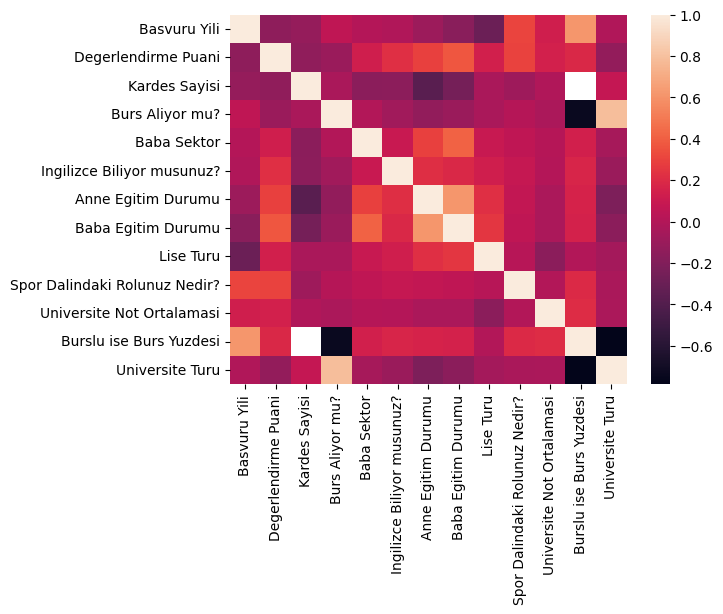

In [85]:
sns.heatmap(df_kor.corr(numeric_only=True))

<Axes: xlabel='Degerlendirme Puani', ylabel='Density'>

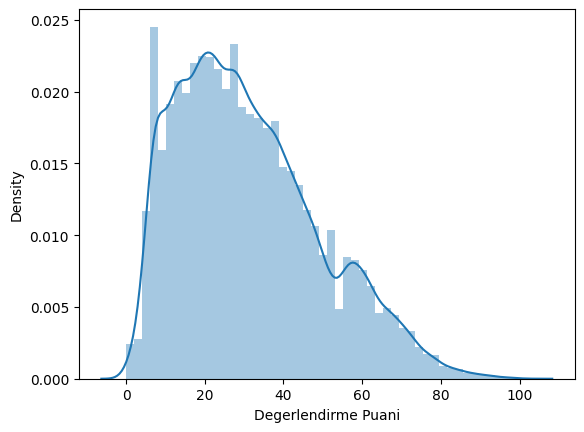

In [86]:
sns.distplot(df_train["Degerlendirme Puani"])

In [87]:
df_train.sort_values("Degerlendirme Puani",ascending=False).head(20)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id,Dogum Yili,Basvuru Yasi
24392,2016,102.0,Erkek,1992-07-22,Tekirdağ,10.0,i̇stanbul teknik üniversitesi,2.0,NaN,1,...,"Darüşşafakalılar Derneği, Darüşşafakalılar Cem...",Evet,Evet,0,1.0,3.0,NaN,24392,1992.0,24.0
24469,2016,100.0,Erkek,1993-11-23,Mersin,10.0,i̇stanbul teknik üniversitesi,2.0,NaN,1,...,E# ve itü gönülülük kulüplerinde yer aldım,Evet,Evet,0,1.0,3.0,NaN,24469,1993.0,23.0
24001,2016,98.0,Erkek,1992-02-09,Adana,10.0,i̇stanbul teknik üniversitesi,2.0,NaN,1,...,İTÜ Gönüllülük Kulübü,Evet,Hayır,0,1.0,3.0,NaN,24001,1992.0,24.0
22845,2016,98.0,Erkek,1992-05-23,İstanbul,10.0,boğaziçi üniversitesi,2.0,NaN,1,...,Bakırköy Rotaract Kulübü,Evet,Evet,0,1.0,3.0,NaN,22845,1992.0,24.0
23374,2016,98.0,Erkek,1995-12-05,Elazığ,7.0,orta doğu teknik üniversitesi,2.0,NaN,1,...,TEMA,Evet,Evet,0,1.0,3.0,NaN,23374,1995.0,21.0
24313,2016,98.0,Kadın,1995-06-09,İstanbul,10.0,i̇stanbul teknik üniversitesi,2.0,NaN,1,...,"ITu Gonulluluk Kulubu, MAKE A WISH, AIESEC",Evet,Evet,0,1.0,3.0,NaN,24313,1995.0,21.0
25319,2016,98.0,Erkek,1995-01-03,Uşak,7.0,orta doğu teknik üniversitesi,2.0,NaN,1,...,LÖSEV,Evet,Evet,0,1.0,3.0,NaN,25319,1995.0,21.0
26279,2016,98.0,Kadın,1996-01-01,Ankara,7.0,orta doğu teknik üniversitesi,2.0,NaN,1,...,Greenpeace,Evet,Hayır,0,1.0,3.0,NaN,26279,1996.0,20.0
24618,2016,98.0,Erkek,1996-05-04,İstanbul,10.0,koç üniversitesi,1.0,NaN,1,...,İstanbul Sanayi Odası Vakfı,Evet,Evet,0,1.0,3.0,NaN,24618,1996.0,20.0
23300,2016,98.0,Kadın,1993-11-03,İzmir,9.0,dokuz eylül üniversitesi,2.0,NaN,1,...,Aslında resmi olarak üye değilim ama kız arkad...,Evet,Evet,0,1.0,3.0,NaN,23300,1993.0,23.0


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47921 entries, 16384 to 65124
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               47921 non-null  int64  
 1   Degerlendirme Puani                                        47920 non-null  float64
 2   Cinsiyet                                                   47816 non-null  object 
 3   Dogum Tarihi                                               47803 non-null  object 
 4   Dogum Yeri                                                 43398 non-null  object 
 5   Ikametgah Sehri                                            18337 non-null  float64
 6   Universite Adi                                             47850 non-null  object 
 7   Universite Turu                                            47744 non-null  float64
 8   Burslu 

In [89]:
df_train['Dogum Yili']

16384    1994.0
16385       NaN
16386       NaN
16387       NaN
16388       NaN
          ...  
65120    2003.0
65121    2002.0
65122    1999.0
65123    2000.0
65124    2000.0
Name: Dogum Yili, Length: 47921, dtype: float64

## Missing Values

In [90]:
missing_threshold = 0.75

# Drop columns with high missing values
high_missing_columns = df_train.columns[df_train.isnull().mean() > missing_threshold]
df_train = df_train.drop(columns=high_missing_columns)
df_test = df_test.drop(columns=high_missing_columns)

target = 'Degerlendirme Puani'

# Iterate through the columns of df_train and fill missing values
for column in df_train.columns:
    if df_train[column].isnull().any():
        if df_train[column].dtype == 'object':
            # For categorical columns, use mode
            mode_value = df_train[column].mode()[0]
            df_train[column] = df_train[column].fillna(mode_value)
            
            # Check if the column exists in df_test before filling it
            if column in df_test.columns and column != target:
                df_test[column] = df_test[column].fillna(mode_value)
        else:
            # For numerical columns, use median
            median_value = df_train[column].median()
            df_train[column] = df_train[column].fillna(median_value)
            
            # Check if the column exists in df_test before filling it
            if column in df_test.columns and column != target:
                df_test[column] = df_test[column].fillna(median_value)


## Encoding

In [91]:
top_40_categories = df_train["Bölüm"].value_counts().head(40).index
df_train["Bölüm"] = df_train["Bölüm"].apply(lambda x: x if x in top_40_categories else "Other")
dummies = pd.get_dummies(df_train["Bölüm"], prefix="Bölüm")
df_train["Bölüm"] = dummies.groupby(dummies.columns, axis=1).sum().idxmax(axis=1)
df_train.drop("Bölüm", axis=1, inplace=True)

In [92]:
'''categorical_columns = [
    'Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri', 
    'Universite Kacinci Sinif', 'Daha Once Baska Bir Universiteden Mezun Olmus', 
    'Lise Adi', 'Lise Sehir', 'Lise Mezuniyet Notu', 'Baska Bir Kurumdan Burs Aliyor mu?',
    'Anne Calisma Durumu', 'Anne Sektor', 'Baba Calisma Durumu', 
    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 'Uye Oldugunuz Kulubun Ismi',
    'Aktif olarak bir STK üyesi misiniz?', "Hangi STK'nin Uyesisiniz?", 
    'Stk Projesine Katildiniz Mi?', 'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 
    'Dogum Yeri Temizlenmiş', 'Universite Turu', 'Baska Kurumdan Aldigi Burs Miktari',
    'Lise Bolumu', 'Lise Turu', 'Universite Adi', 'Ingilizce Biliyor musunuz?'
]

for column in categorical_columns:
    df_train[column] = df_train[column].fillna(df_train[column].mode()[0])

df_train['Dogum Tarihi'] = pd.to_datetime(df_train['Dogum Tarihi'], errors='coerce')
df_train['Dogum Tarihi'] = (pd.Timestamp.now() - df_train['Dogum Tarihi']).dt.days
df_train['Dogum Tarihi'] = df_train['Dogum Tarihi'].fillna(df_train['Dogum Tarihi'].median())

label_columns = [
    'Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri', 'Ikametgah Sehri', 'Ikametgah Sehri Temizlenmiş',
    'Universite Kacinci Sinif', 'Daha Once Baska Bir Universiteden Mezun Olmus', 
    'Lise Adi', 'Lise Sehir', 'Lise Mezuniyet Notu', 'Baska Bir Kurumdan Burs Aliyor mu?',
    'Anne Calisma Durumu', 'Anne Sektor', 'Baba Calisma Durumu', 
    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 'Uye Oldugunuz Kulubun Ismi', 
    'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Aktif olarak bir STK üyesi misiniz?', 
    "Hangi STK'nin Uyesisiniz?", 'Stk Projesine Katildiniz Mi?', 
    'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
    'Ingilizce Seviyeniz?', 'Dogum Yeri Temizlenmiş', 'Lise Not Grubu', 'Universite Turu',
    'Baska Kurumdan Aldigi Burs Miktari', 'Lise Bolumu', 'Lise Turu', 'Kardes Sayisi', 
    'Baba Sektor', 'Spor Dalindaki Rolunuz Nedir?', 'Baba Egitim Durumu', 'Universite Adi','Bölüm_encoded'
]

for col in label_columns:
    df_train[col] = df_train[col].astype(str)
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

df_train = pd.get_dummies(df_train, drop_first=True)

df_test = pd.get_dummies(df_test, drop_first=True)
'''

'categorical_columns = [\n    \'Cinsiyet\', \'Dogum Tarihi\', \'Dogum Yeri\', \n    \'Universite Kacinci Sinif\', \'Daha Once Baska Bir Universiteden Mezun Olmus\', \n    \'Lise Adi\', \'Lise Sehir\', \'Lise Mezuniyet Notu\', \'Baska Bir Kurumdan Burs Aliyor mu?\',\n    \'Anne Calisma Durumu\', \'Anne Sektor\', \'Baba Calisma Durumu\', \n    \'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?\', \'Uye Oldugunuz Kulubun Ismi\',\n    \'Aktif olarak bir STK üyesi misiniz?\', "Hangi STK\'nin Uyesisiniz?", \n    \'Stk Projesine Katildiniz Mi?\', \'Girisimcilikle Ilgili Deneyiminiz Var Mi?\', \n    \'Dogum Yeri Temizlenmiş\', \'Universite Turu\', \'Baska Kurumdan Aldigi Burs Miktari\',\n    \'Lise Bolumu\', \'Lise Turu\', \'Universite Adi\', \'Ingilizce Biliyor musunuz?\'\n]\n\nfor column in categorical_columns:\n    df_train[column] = df_train[column].fillna(df_train[column].mode()[0])\n\ndf_train[\'Dogum Tarihi\'] = pd.to_datetime(df_train[\'Dogum Tarihi\'], errors=\'coerce\')\ndf_train

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47921 entries, 16384 to 65124
Data columns (total 39 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               47921 non-null  int64  
 1   Degerlendirme Puani                                        47921 non-null  float64
 2   Cinsiyet                                                   47921 non-null  object 
 3   Dogum Tarihi                                               47921 non-null  object 
 4   Dogum Yeri                                                 47921 non-null  object 
 5   Ikametgah Sehri                                            47921 non-null  float64
 6   Universite Adi                                             47921 non-null  object 
 7   Universite Turu                                            47921 non-null  float64
 8   Burs Al

In [94]:
def knn_impute(df, n_neighbors=5):   
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)
    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(
            dict(enumerate(df[col].astype('category').cat.categories)))
    return df_imputed

In [95]:
df_train_imputed = knn_impute(df_train, n_neighbors=5)
df_test_imputed = knn_impute(df_test, n_neighbors=5)

# Check the length of the imputed datasets
print(f"Length of train_df after imputation: {len(df_train_imputed)}")
print(f"Length of test_df after imputation: {len(df_test_imputed)}")

Length of train_df after imputation: 47921
Length of test_df after imputation: 11049


In [96]:
cat_cols_train = df_train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'Degerlendirme Puani']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47921 entries, 16384 to 65124
Data columns (total 39 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               47921 non-null  int64  
 1   Degerlendirme Puani                                        47921 non-null  float64
 2   Cinsiyet                                                   47921 non-null  object 
 3   Dogum Tarihi                                               47921 non-null  object 
 4   Dogum Yeri                                                 47921 non-null  object 
 5   Ikametgah Sehri                                            47921 non-null  float64
 6   Universite Adi                                             47921 non-null  object 
 7   Universite Turu                                            47921 non-null  float64
 8   Burs Al

In [98]:
print(df_train.columns)

Index(['Basvuru Yili', 'Degerlendirme Puani', 'Cinsiyet', 'Dogum Tarihi',
       'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burs Aliyor mu?', 'Universite Kacinci Sinif',
       'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Sehir', 'Lise Turu', 'Lise Bolumu', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
       'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misi

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47921 entries, 16384 to 65124
Data columns (total 39 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               47921 non-null  int64  
 1   Degerlendirme Puani                                        47921 non-null  float64
 2   Cinsiyet                                                   47921 non-null  object 
 3   Dogum Tarihi                                               47921 non-null  object 
 4   Dogum Yeri                                                 47921 non-null  object 
 5   Ikametgah Sehri                                            47921 non-null  float64
 6   Universite Adi                                             47921 non-null  object 
 7   Universite Turu                                            47921 non-null  float64
 8   Burs Al

In [100]:
df_train['Basvuru Yili']

16384    2015
16385    2015
16386    2015
16387    2015
16388    2015
         ... 
65120    2022
65121    2022
65122    2022
65123    2022
65124    2022
Name: Basvuru Yili, Length: 47921, dtype: int64

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47921 entries, 16384 to 65124
Data columns (total 39 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               47921 non-null  int64  
 1   Degerlendirme Puani                                        47921 non-null  float64
 2   Cinsiyet                                                   47921 non-null  object 
 3   Dogum Tarihi                                               47921 non-null  object 
 4   Dogum Yeri                                                 47921 non-null  object 
 5   Ikametgah Sehri                                            47921 non-null  float64
 6   Universite Adi                                             47921 non-null  object 
 7   Universite Turu                                            47921 non-null  float64
 8   Burs Al

In [102]:
df_train.isnull().sum().sort_values(ascending=False)

Basvuru Yili                                                 0
Aktif olarak bir STK üyesi misiniz?                          0
Baba Egitim Durumu                                           0
Baba Calisma Durumu                                          0
Baba Sektor                                                  0
Kardes Sayisi                                                0
Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?         0
Profesyonel Bir Spor Daliyla Mesgul musunuz?                 0
Spor Dalindaki Rolunuz Nedir?                                0
Hangi STK'nin Uyesisiniz?                                    0
Anne Calisma Durumu                                          0
Stk Projesine Katildiniz Mi?                                 0
Girisimcilikle Ilgili Deneyiminiz Var Mi?                    0
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?    0
Ingilizce Biliyor musunuz?                                   0
Ingilizce Seviyeniz?                                   

In [103]:
print(df_train.columns)

Index(['Basvuru Yili', 'Degerlendirme Puani', 'Cinsiyet', 'Dogum Tarihi',
       'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burs Aliyor mu?', 'Universite Kacinci Sinif',
       'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Sehir', 'Lise Turu', 'Lise Bolumu', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
       'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misi

In [104]:
len(df_test)

11049

In [105]:
df_train = df_train_imputed
df_test = df_test_imputed

In [106]:
le = LabelEncoder()
df_train['Degerlendirme Puani'] = le.fit_transform(df_train['Degerlendirme Puani'])

In [107]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Degerlendirme Puani', axis=1)
y = df_train['Degerlendirme Puani']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
'''from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def all_reg_models(X_train,X_test,y_train,y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBoost": XGBRegressor(),
        "LightGBM": LGBMRegressor(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "KNeighborsRegressor":KNeighborsRegressor(),
        "SVR":SVR(),
        "MLPRegressor":MLPRegressor()
    }
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)  
        r2 = r2_score(y_test, predictions)
        results[name] = (mse, rmse, r2)

    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")

    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(50*"*")
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")'''

'from sklearn.tree import DecisionTreeRegressor\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.linear_model import Ridge, Lasso, ElasticNet\nfrom xgboost import XGBRegressor\nfrom lightgbm import LGBMRegressor\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.svm import SVR\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.neural_network import MLPRegressor\nimport numpy as np\nfrom sklearn.metrics import mean_squared_error, r2_score\n\ndef all_reg_models(X_train,X_test,y_train,y_test):\n    models = {\n        "Linear Regression": LinearRegression(),\n        "Decision Tree": DecisionTreeRegressor(),\n        "Random Forest": RandomForestRegressor(),\n        "Gradient Boosting": GradientBoostingR

In [109]:
#  all_reg_models(X_train,X_test,y_train,y_test)

 ## XGBoost

In [110]:
model_xgb = xgb.XGBRegressor(
    n_estimators=1000,  
    learning_rate=0.1,  
    max_depth=9,  
    subsample=0.9,  
    colsample_bytree=0.7,  
    random_state=42
)

XGB=model_xgb.fit(X_train, y_train, early_stopping_rounds=10, 
              eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = model_xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost Model RMSE: {rmse_xgb:.2f}")

XGBoost Model RMSE: 5.27


In [111]:
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Model R² Score: {r2_xgb}")

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost Model MAE: {mae_xgb:.2f}")

XGBoost Model R² Score: 0.913433126612885
XGBoost Model MAE: 3.25


In [112]:
df_test_encoded = pd.get_dummies(df_test)

In [113]:
X_train_columns = X_train.columns
df_test_encoded = df_test_encoded.reindex(columns=X_train_columns)

In [114]:
y_pred_competition = model_xgb.predict(df_test_encoded)

print(f"Competition test set predictions: {y_pred_xgb[:5]}")

Competition test set predictions: [57.992428 41.134518 36.061966 17.248255 25.30337 ]


In [115]:
len(y_pred_competition)

11049

In [116]:
submission_df = pd.DataFrame({
    'id': df_test['id'].astype(int), 
    'Degerlendirme Puani': y_pred_competition
})

submission_df.to_csv('submis.csv', index=False)

print(f"Submission file size: {submission_df.shape[0]}")

Submission file size: 11049


In [117]:
y_pred=model_xgb.predict(X_test)

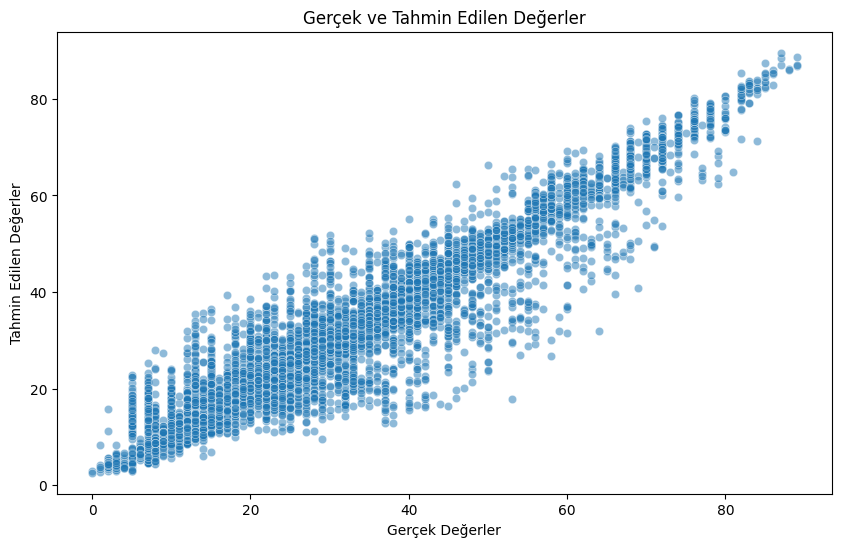

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.show()